In [1]:
import os
import pandas as pd
import json


df_llama21 = pd.read_csv('/home/grenders95/710/710_project/data/eval/inference/llama2_inference_run6.csv')
df_llama22 = pd.read_csv('/home/grenders95/710/710_project/data/eval/inference/llama2_inference_run2.csv')
df_llama23 = pd.read_csv('/home/grenders95/710/710_project/data/eval/inference/llama2_inference_run3.csv')
df_llama24 = pd.read_csv('/home/grenders95/710/710_project/data/eval/inference/llama2_inference_run4.csv')
df_llama25 = pd.read_csv('/home/grenders95/710/710_project/data/eval/inference/llama2_inference_run5.csv')


In [2]:


df_llama21.rename(columns={'generated_sbom': 'generated_sbom1'}, inplace=True)

df_llama21['generated_sbom2'] = df_llama22['generated_sbom']
df_llama21['generated_sbom3'] = df_llama23['generated_sbom']
df_llama21['generated_sbom4'] = df_llama24['generated_sbom']
df_llama21['generated_sbom5'] = df_llama25['generated_sbom']

df_llama2 = df_llama21.copy()

print(df_llama2.head())


           org_repo_name                                       requirements  \
0      johannfaouzi_pyts  numpy>=1.22.4\nscipy>=1.8.1\nscikit-learn>1.2....   
1        brainix_pottery  async-timeout==4.0.3\nAuthlib==1.3.0\nbandit==...   
2  Doubiiu_DynamiCrafter  decord==0.6.0\neinops==0.3.0\nimageio==2.9.0\n...   
3     huawei-noah_smarts  absl-py==2.1.0\naiosignal==1.3.1\nastunparse==...   
4       xonshiz_comic-dl  tqdm\nbs4\nrequests\nclint\nimg2pdf\nfuture\nc...   

                                                sbom  \
0  {\n  "SPDXID": "SPDXRef-DOCUMENT",\n  "spdxVer...   
1  {\n  "SPDXID": "SPDXRef-DOCUMENT",\n  "spdxVer...   
2  {\n  "SPDXID": "SPDXRef-DOCUMENT",\n  "spdxVer...   
3  {\n  "SPDXID": "SPDXRef-DOCUMENT",\n  "spdxVer...   
4  {\n  "SPDXID": "SPDXRef-DOCUMENT",\n  "spdxVer...   

                                mod_manifest_newreqs  num_dependencies  \
0  Org: johannfaouzi\nRepo: pyts\ndownloadLocatio...                 5   
1  Org: brainix\nRepo: pottery\ndownload

In [3]:
import numpy as np

def extract_json_sbom(sbom_text):
    # Splitting the text at the [/INST] marker
    split_text = sbom_text.split('[/INST]')
    # Ensure there is content after the first [/INST] and it starts with a '{'
    if len(split_text) > 1:
        # Check for '###' in the remainder and limit extraction to before '###'
        post_inst_content = split_text[1].strip()
        hash_pos = post_inst_content.find('###')
        
        # If '###' is found, adjust the post_inst_content to end before '###'
        if hash_pos != -1:
            post_inst_content = post_inst_content[:hash_pos].strip()
        
        # Now, check if the adjusted content starts with '{'
        if post_inst_content.startswith('{'):
            return post_inst_content
    # Default case if conditions are not met
    return np.NaN  

# Apply the function to each relevant column separately
df_llama2['gen_sbom1_noprompt'] = df_llama2['generated_sbom1'].apply(extract_json_sbom)
df_llama2['gen_sbom2_noprompt'] = df_llama2['generated_sbom2'].apply(extract_json_sbom)
df_llama2['gen_sbom3_noprompt'] = df_llama2['generated_sbom3'].apply(extract_json_sbom)
df_llama2['gen_sbom4_noprompt'] = df_llama2['generated_sbom4'].apply(extract_json_sbom)
df_llama2['gen_sbom5_noprompt'] = df_llama2['generated_sbom5'].apply(extract_json_sbom)

In [4]:
# Specify the index of interest
index_to_lookup = 79

# Print the values of the two generated_sbom columns for the specified index
print("generated_sbom in df_llama2 for index {}: {}".format(index_to_lookup, df_llama2.loc[index_to_lookup, 'generated_sbom1']))
print("generated_sbom2 (from df_llama2) for index {}: {}".format(index_to_lookup, df_llama2.loc[index_to_lookup, 'generated_sbom2']))

generated_sbom in df_codellama1 for index 79: [INST] Given a target manifest file, construct the corresponding SPDX SBOM in .json format.

### Target manifest:
Org: devamoghs
Repo: machine-learning-with-python
downloadLocation: git+https://github.com/devAmoghS/Machine-Learning-with-Python
licenseDeclared: MIT
Dependancies:
Keras==2.2.4
Keras-Preprocessing==1.0.5
PySocks==1.6.8
Pygments==2.7.4
Quandl==3.4.5
asn1crypto==0.24.0
backcall==0.1.0
beautifulsoup4==4.6.3
certifi==2022.12.7
cffi==1.11.5
chardet==3.0.4
cryptography==39.0.1
cycler==0.10.0
h5py==2.9.0
idna==2.7
inflection==0.3.1
ipython==8.10.0
jedi==0.13.2
kiwisolver==1.0.1
matplotlib==3.0.0
more-itertools==5.0.0
numpy==1.22.0
pandas==0.23.4
patsy==0.5.0
pexpect==4.6.0
pickleshare==0.7.5
pip==21.1
ptyprocess==0.6.0
pyOpenSSL==18.0.0
pycparser==2.19
pyparsing==2.2.1
python-dateutil==2.7.3
pytz==2018.5
requests>=2.20.0
scikit-learn==0.20.0
scipy==1.1.0
seaborn==0.9.0
setuptools==65.5.1
six==1.11.0
statsmodels==0.9.0
tornado==4.0.2
t

In [5]:
not_found_rows_gen_sbom1 = df_llama2[pd.isna(df_llama2['gen_sbom1_noprompt'])]
print("Indices of rows with 'JSON structure not found' in gen_sbom_noprompt:", not_found_rows_gen_sbom1.index.tolist())
if not not_found_rows_gen_sbom1.empty:
    print("\nDetailed view of rows with 'JSON structure not found' in gen_sbom1_noprompt:")
    for index, row in not_found_rows_gen_sbom1.iterrows():
        print(f"Index: {index}, Org Repo Name: {row.get('org_repo_name', 'N/A')}")

not_found_rows_gen_sbom2 = df_llama2[pd.isna(df_llama2['gen_sbom2_noprompt'])]
print("\nIndices of rows with 'JSON structure not found' in gen_sbom2_noprompt:", not_found_rows_gen_sbom2.index.tolist())
if not not_found_rows_gen_sbom2.empty:
    print("\nDetailed view of rows with 'JSON structure not found' in gen_sbom2_noprompt:")
    for index, row in not_found_rows_gen_sbom2.iterrows():
        print(f"Index: {index}, Org Repo Name: {row.get('org_repo_name', 'N/A')}")

not_found_rows_gen_sbom3 = df_llama2[pd.isna(df_llama2['gen_sbom3_noprompt'])]
print("Indices of rows with 'JSON structure not found' in gen_sbom3_noprompt:", not_found_rows_gen_sbom3.index.tolist())
if not not_found_rows_gen_sbom3.empty:
    print("\nDetailed view of rows with 'JSON structure not found' in gen_sbom3_noprompt:")
    for index, row in not_found_rows_gen_sbom3.iterrows():
        print(f"Index: {index}, Org Repo Name: {row.get('org_repo_name', 'N/A')}")

not_found_rows_gen_sbom4 = df_llama2[pd.isna(df_llama2['gen_sbom4_noprompt'])]
print("\nIndices of rows with 'JSON structure not found' in gen_sbom4_noprompt:", not_found_rows_gen_sbom4.index.tolist())
if not not_found_rows_gen_sbom4.empty:
    print("\nDetailed view of rows with 'JSON structure not found' in gen_sbom4_noprompt:")
    for index, row in not_found_rows_gen_sbom4.iterrows():
        print(f"Index: {index}, Org Repo Name: {row.get('org_repo_name', 'N/A')}")

not_found_rows_gen_sbom5 = df_llama2[pd.isna(df_llama2['gen_sbom5_noprompt'])]
print("Indices of rows with 'JSON structure not found' in gen_sbom5_noprompt:", not_found_rows_gen_sbom5.index.tolist())
if not not_found_rows_gen_sbom5.empty:
    print("\nDetailed view of rows with 'JSON structure not found' in gen_sbom5_noprompt:")
    for index, row in not_found_rows_gen_sbom5.iterrows():
        print(f"Index: {index}, Org Repo Name: {row.get('org_repo_name', 'N/A')}")


Indices of rows with 'JSON structure not found' in gen_sbom_noprompt: [1, 3, 24, 29, 40, 66, 79, 92, 96, 114, 115, 125, 128, 174, 227, 298, 299, 304, 349, 353, 357, 379, 387, 389, 400, 405, 442, 445, 457, 464, 489, 495, 517, 521]

Detailed view of rows with 'JSON structure not found' in gen_sbom1_noprompt:
Index: 1, Org Repo Name: brainix_pottery
Index: 3, Org Repo Name: huawei-noah_smarts
Index: 24, Org Repo Name: odoo_odoo
Index: 29, Org Repo Name: haozhang95_python24
Index: 40, Org Repo Name: netbox-community_netbox
Index: 66, Org Repo Name: rhinosecuritylabs_pacu
Index: 79, Org Repo Name: devamoghs_machine-learning-with-python
Index: 92, Org Repo Name: bluefissure_otterbot
Index: 96, Org Repo Name: rese1f_StableVideo
Index: 114, Org Repo Name: google_timesketch
Index: 115, Org Repo Name: galaxyproject_galaxy
Index: 125, Org Repo Name: tautulli_tautulli
Index: 128, Org Repo Name: google-deepmind_alphageometry
Index: 174, Org Repo Name: anil-matcha_chatpdf
Index: 227, Org Repo Name: 

In [4]:
import json_repair
import pandas as pd  

def repair_json_in_col(json_str):
    if pd.isna(json_str):
        return json_str 

    try:
        # Attempt to repair the JSON string
        repaired_json = json_repair.repair_json(json_str)
        return repaired_json
    except Exception as e:
        # Handle cases where the JSON cannot be repaired
        print(f"Error repairing JSON: {e}")
        return None  

In [5]:
df_llama2['gen_sbom1_noprompt'] = df_llama2['gen_sbom1_noprompt'].apply(repair_json_in_col)

df_llama2['gen_sbom2_noprompt'] = df_llama2['gen_sbom2_noprompt'].apply(repair_json_in_col)

df_llama2['gen_sbom3_noprompt'] = df_llama2['gen_sbom3_noprompt'].apply(repair_json_in_col)

df_llama2['gen_sbom4_noprompt'] = df_llama2['gen_sbom4_noprompt'].apply(repair_json_in_col)

df_llama2['gen_sbom5_noprompt'] = df_llama2['gen_sbom5_noprompt'].apply(repair_json_in_col)




In [8]:
# Filter the DataFrame to find rows where 'gen_sbom_noprompt' is None or NaN
rows_with_none_gen_sbom_noprompt = df_llama2[df_llama2['gen_sbom3_noprompt'].isnull()]

# Check if there are any such rows and print details
if not rows_with_none_gen_sbom_noprompt.empty:
    print("Rows with 'gen_sbom_noprompt' as None or NaN after repair:")
    print(rows_with_none_gen_sbom_noprompt)
else:
    print("No rows with 'gen_sbom_noprompt' as None or NaN were found after repair.")



Rows with 'gen_sbom_noprompt' as None or NaN after repair:
                              org_repo_name  \
1                           brainix_pottery   
3                        huawei-noah_smarts   
24                                odoo_odoo   
29                      haozhang95_python24   
40                  netbox-community_netbox   
66                   rhinosecuritylabs_pacu   
79   devamoghs_machine-learning-with-python   
92                     bluefissure_otterbot   
96                       rese1f_StableVideo   
114                       google_timesketch   
115                    galaxyproject_galaxy   
125                       tautulli_tautulli   
128           google-deepmind_alphageometry   
174                     anil-matcha_chatpdf   
227                         flaskbb_flaskbb   
298                     circl_ail-framework   
299                    hotshotco_Hotshot-XL   
304                         liwanlei_fxtest   
349      yaofanguk_video-subtitle-generator   
3

In [6]:
import json
import pandas as pd 

def flatten_sbom_json(row, column_name):
    sbom_data = row[column_name]
    
    if pd.isna(sbom_data):
        return np.nan  
    
    if isinstance(sbom_data, str):
        try:
            sbom_data = json.loads(sbom_data)
        except json.JSONDecodeError:
            return 'Invalid JSON'
    elif not isinstance(sbom_data, dict):
        return 'Unsupported data format'
    
    flattened = []
    try:
        for key, value in sbom_data.items():
            if key != 'packages':  
                flattened.append(f'creation/{key}: {value}')
            else:
                for package in value:
                    for p_key, p_value in package.items():
                        flattened.append(f'packages/{p_key}: {p_value}')
    except AttributeError:
        return 'Error processing JSON structure'
    
    return '\n'.join(flattened)

def apply_flatten_sbom(df, source_column, target_column):
    df.loc[:, target_column] = df.apply(lambda row: flatten_sbom_json(row, source_column), axis=1)

apply_flatten_sbom(df_llama2, 'sbom', 'flattened_gt_sbom')
apply_flatten_sbom(df_llama2, 'gen_sbom1_noprompt', 'flattened_gen_sbom1')
apply_flatten_sbom(df_llama2, 'gen_sbom2_noprompt', 'flattened_gen_sbom2')
apply_flatten_sbom(df_llama2, 'gen_sbom3_noprompt', 'flattened_gen_sbom3')
apply_flatten_sbom(df_llama2, 'gen_sbom4_noprompt', 'flattened_gen_sbom4')
apply_flatten_sbom(df_llama2, 'gen_sbom5_noprompt', 'flattened_gen_sbom5')




In [8]:
def parse_fields_to_dict(sbom_text, specific_fields):
    """Parse specified field keys from the flattened SBOM text and count their occurrences."""
    fields_dict = {field: 0 for field in specific_fields}  
    
    if pd.isna(sbom_text):  
        return fields_dict
    
    for line in sbom_text.split('\n'):
        if line.strip():  
            field_key = line.split(':')[0].strip()  
            if field_key in fields_dict:
                fields_dict[field_key] += 1  
    
    return fields_dict

def calculate_precision_recall_for_sboms(gen_sbom_text, gt_sbom_text, specific_fields):
    gen_fields_dict = parse_fields_to_dict(gen_sbom_text, specific_fields)
    gt_fields_dict = parse_fields_to_dict(gt_sbom_text, specific_fields)
    
    tp, fp, fn = 0, 0, 0
    
    # Iterate over the specific fields to calculate TP, FP, and FN based on occurrences
    for field in specific_fields:
        if gen_fields_dict[field] > 0 and gt_fields_dict[field] > 0:
            tp += min(gen_fields_dict[field], gt_fields_dict[field])
            fp += max(gen_fields_dict[field] - gt_fields_dict[field], 0)
            fn += max(gt_fields_dict[field] - gen_fields_dict[field], 0)
        elif gen_fields_dict[field] > 0:
            fp += gen_fields_dict[field]
        elif gt_fields_dict[field] > 0:
            fn += gt_fields_dict[field]
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return precision, recall

In [9]:
# Define the specific fields of interest
specific_fields = [
    "creation/name", "creation/dataLicense", 
    "packages/name", "packages/versionInfo", 
    "packages/downloadLocation", "packages/licenseDeclared", 
    "packages/licenseConcluded"
]

results1 = df_llama2.apply(lambda row: calculate_precision_recall_for_sboms(
    row['flattened_gen_sbom1'], row['flattened_gt_sbom'], specific_fields), axis=1)

results2 = df_llama2.apply(lambda row: calculate_precision_recall_for_sboms(
    row['flattened_gen_sbom2'], row['flattened_gt_sbom'], specific_fields), axis=1)

results3 = df_llama2.apply(lambda row: calculate_precision_recall_for_sboms(
    row['flattened_gen_sbom3'], row['flattened_gt_sbom'], specific_fields), axis=1)

results4 = df_llama2.apply(lambda row: calculate_precision_recall_for_sboms(
    row['flattened_gen_sbom4'], row['flattened_gt_sbom'], specific_fields), axis=1)

results5 = df_llama2.apply(lambda row: calculate_precision_recall_for_sboms(
    row['flattened_gen_sbom5'], row['flattened_gt_sbom'], specific_fields), axis=1)

df_llama2['precision_field1'] = results1.apply(lambda x: x[0])
df_llama2['recall_field1'] = results1.apply(lambda x: x[1])

df_llama2['precision_field2'] = results2.apply(lambda x: x[0])
df_llama2['recall_field2'] = results2.apply(lambda x: x[1])

df_llama2['precision_field3'] = results3.apply(lambda x: x[0])
df_llama2['recall_field3'] = results3.apply(lambda x: x[1])

df_llama2['precision_field4'] = results4.apply(lambda x: x[0])
df_llama2['recall_field4'] = results4.apply(lambda x: x[1])

df_llama2['precision_field5'] = results5.apply(lambda x: x[0])
df_llama2['recall_field5'] = results5.apply(lambda x: x[1])

In [10]:
df_llama2['avg_precision_field'] = (df_llama2['precision_field1'] + df_llama2['precision_field2'] + df_llama2['precision_field3'] + df_llama2['precision_field4'] + df_llama2['precision_field5']) / 5
df_llama2['avg_recall_field'] = (df_llama2['recall_field1'] + df_llama2['recall_field2'] + df_llama2['recall_field3'] + df_llama2['recall_field4'] + df_llama2['recall_field5']) / 5

In [17]:
# Find indices of the three lowest avg_precision values
lowest_precision_indices = df_llama2['avg_precision_field'].nsmallest(3).index
print(f"Indices of the three lowest avg_precision values: {list(lowest_precision_indices)}")

# Find indices of the three lowest avg_recall values
lowest_recall_indices = df_llama2['avg_recall_field'].nsmallest(3).index
print(f"Indices of the three lowest avg_recall values: {list(lowest_recall_indices)}")


Indices of the three lowest avg_precision values: [1, 3, 24]
Indices of the three lowest avg_recall values: [1, 3, 24]


Precision and recall for entire set. 

In [1]:
# Uncomment if csv is saved already
# import os
# import pandas as pd
# import json


# df_llama2 = pd.read_csv('/home/grenders95/710/710_project/data/eval/llama2_set_eval.csv')

In [11]:
average_precision_fields = df_llama2['avg_precision_field'].mean()
average_recall_fields = df_llama2['avg_recall_field'].mean()
data_points = len(df_llama2)

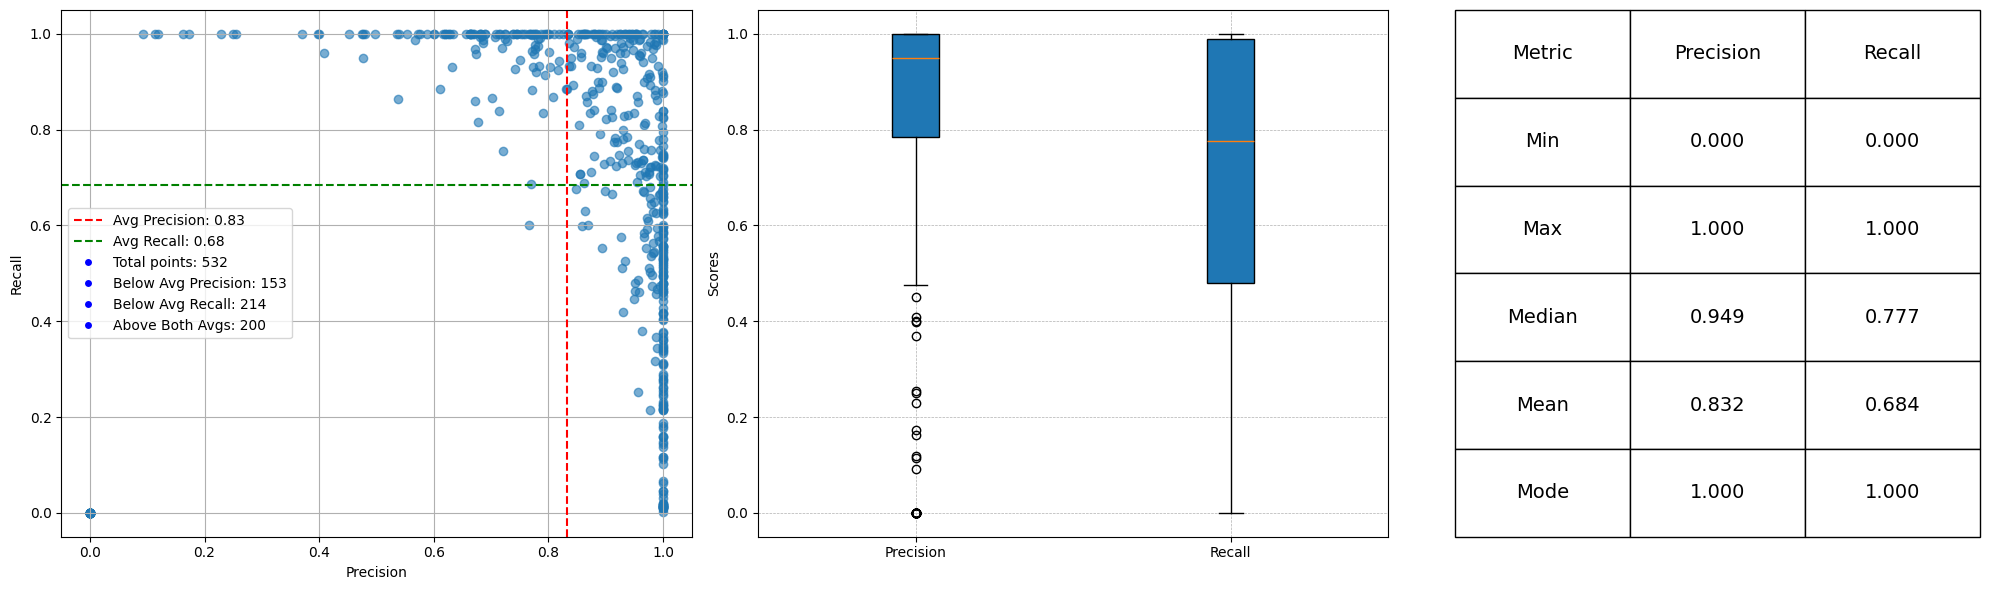

In [12]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import mode
import numpy as np

def create_plots_with_table_and_boxplot_field(dataframe, avg_precision, avg_recall, total_data_points, save_path):
    fig = plt.figure(figsize=(20, 6))
    gs = fig.add_gridspec(1, 3, width_ratios=[3, 3, 2.5])

    # Scatter plot
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter(dataframe['avg_precision_field'], dataframe['avg_recall_field'], alpha=0.6)
    ax1.set_xlabel('Precision')
    ax1.set_ylabel('Recall')
    ax1.grid(True)
    ax1.axvline(x=avg_precision, color='r', linestyle='--', label=f'Avg Precision: {avg_precision:.2f}')
    ax1.axhline(y=avg_recall, color='g', linestyle='--', label=f'Avg Recall: {avg_recall:.2f}')

    # Calculate additional metrics for the legend
    points_below_avg_precision = dataframe[dataframe['avg_precision_field'] < avg_precision].shape[0]
    points_below_avg_recall = dataframe[dataframe['avg_recall_field'] < avg_recall].shape[0]
    points_above_both = dataframe[(dataframe['avg_precision_field'] > avg_precision) & (dataframe['avg_recall_field'] > avg_recall)].shape[0]

    # Create custom legend entries
    custom_lines = [mlines.Line2D([], [], color='r', linestyle='--', markersize=15, label=f'Avg Precision: {avg_precision:.2f}'),
                    mlines.Line2D([], [], color='g', linestyle='--', markersize=15, label=f'Avg Recall: {avg_recall:.2f}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Total points: {total_data_points}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Precision: {points_below_avg_precision}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Recall: {points_below_avg_recall}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Above Both Avgs: {points_above_both}')]

    # Add the custom legend to the plot
    ax1.legend(handles=custom_lines, loc='center left')

    # Box plot
    ax2 = fig.add_subplot(gs[1])
    ax2.boxplot(
        [dataframe['avg_precision_field'], dataframe['avg_recall_field']],
        patch_artist=True,
        labels=['Precision', 'Recall']
    )
    ax2.set_ylabel('Scores')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Prepare data for the table
    stats_precision = get_statistics(dataframe['avg_precision_field'].dropna())
    stats_recall = get_statistics(dataframe['avg_recall_field'].dropna())

    # Table data
    table_data = [
        ["Min", stats_precision[0], stats_recall[0]],
        ["Max", stats_precision[1], stats_recall[1]],
        ["Median", stats_precision[2], stats_recall[2]],
        ["Mean", stats_precision[3], stats_recall[3]],
        ["Mode", stats_precision[4] or "N/A", stats_recall[4] or "N/A"]
    ]

    ax3 = fig.add_subplot(gs[2])
    ax3.axis('off')
    table = ax3.table(cellText=table_data, colLabels=['Metric', 'Precision', 'Recall'], cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()

def format_statistic(value):
    if value is None or (isinstance(value, np.ndarray) and value.size == 0):
        return "N/A"
    return f"{value:.3f}"

def get_statistics(column):
    mode_result = mode(column, nan_policy='omit')
    mode_val = mode_result.mode if mode_result.mode.size > 0 else None
    return [
        format_statistic(np.min(column)),
        format_statistic(np.max(column)),
        format_statistic(np.median(column)),
        format_statistic(np.mean(column)),
        format_statistic(mode_val)
    ]

create_plots_with_table_and_boxplot_field(df_llama2, average_precision_fields, average_recall_fields, data_points, '/home/grenders95/710/710_project/data/figures/eval/llama2/2testset_scatter_box_field.png')

Precision and recall for repositories with less than 15 requirments and repositories with 15 or more requirements. 

In [13]:
# Filter the DataFrame into two subsets
df_less_than_15 = df_llama2[df_llama2['num_dependencies'] < 15]
df_greater_than_or_equal_15 = df_llama2[df_llama2['num_dependencies'] >= 15]

# Calculate average precision and recall for each subset
average_precision_field_less_than_15 = df_less_than_15['avg_precision_field'].mean()
average_recall_field_less_than_15 = df_less_than_15['avg_recall_field'].mean()

average_precision_field_greater_than_15 = df_greater_than_or_equal_15['avg_precision_field'].mean()
average_recall_field_greater_than_15 = df_greater_than_or_equal_15['avg_recall_field'].mean()

total_data_points_less_than_15 = len(df_less_than_15) 
total_data_points_greater_than_or_equal_15 = len(df_greater_than_or_equal_15) 


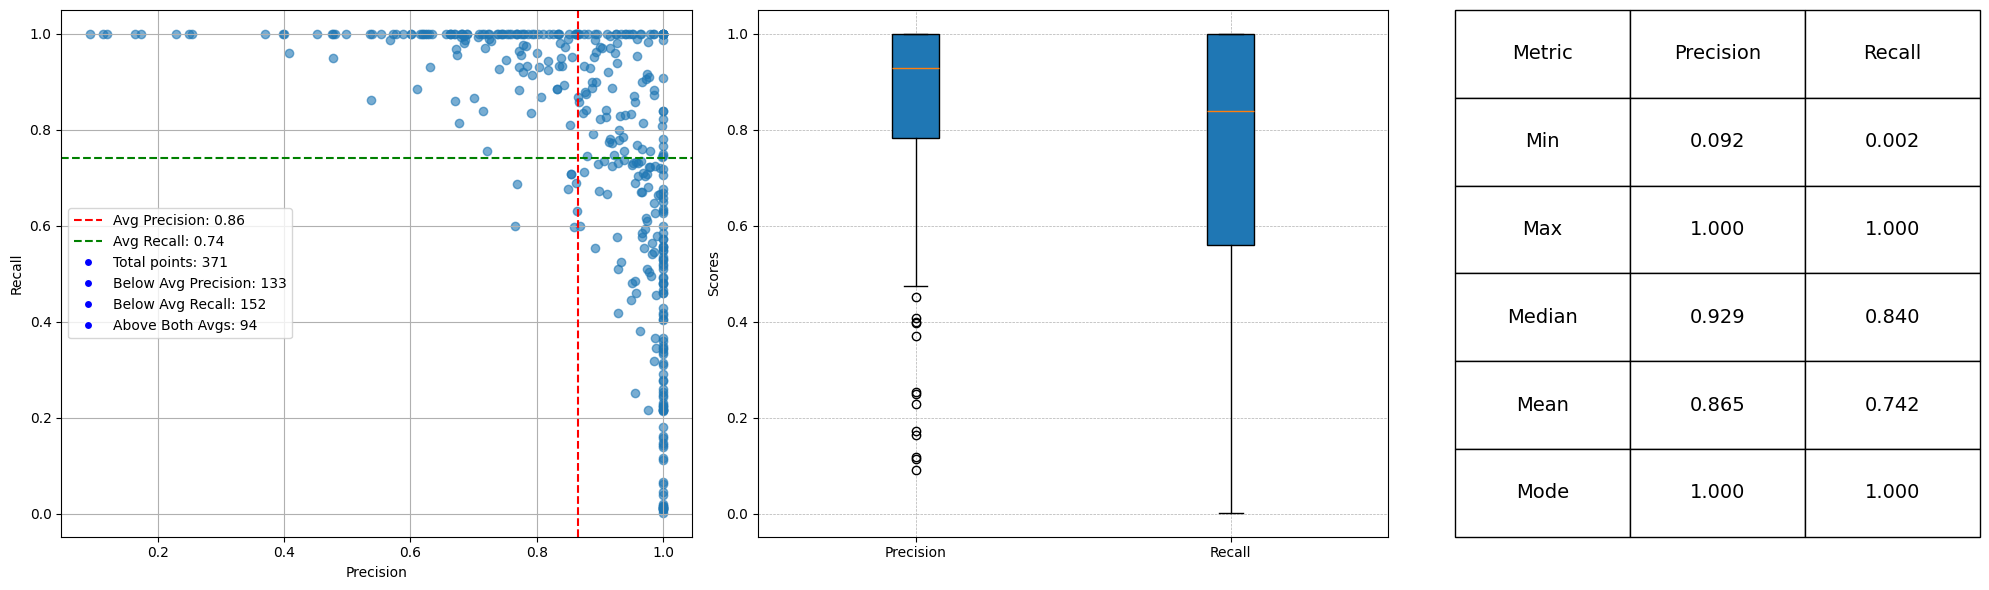

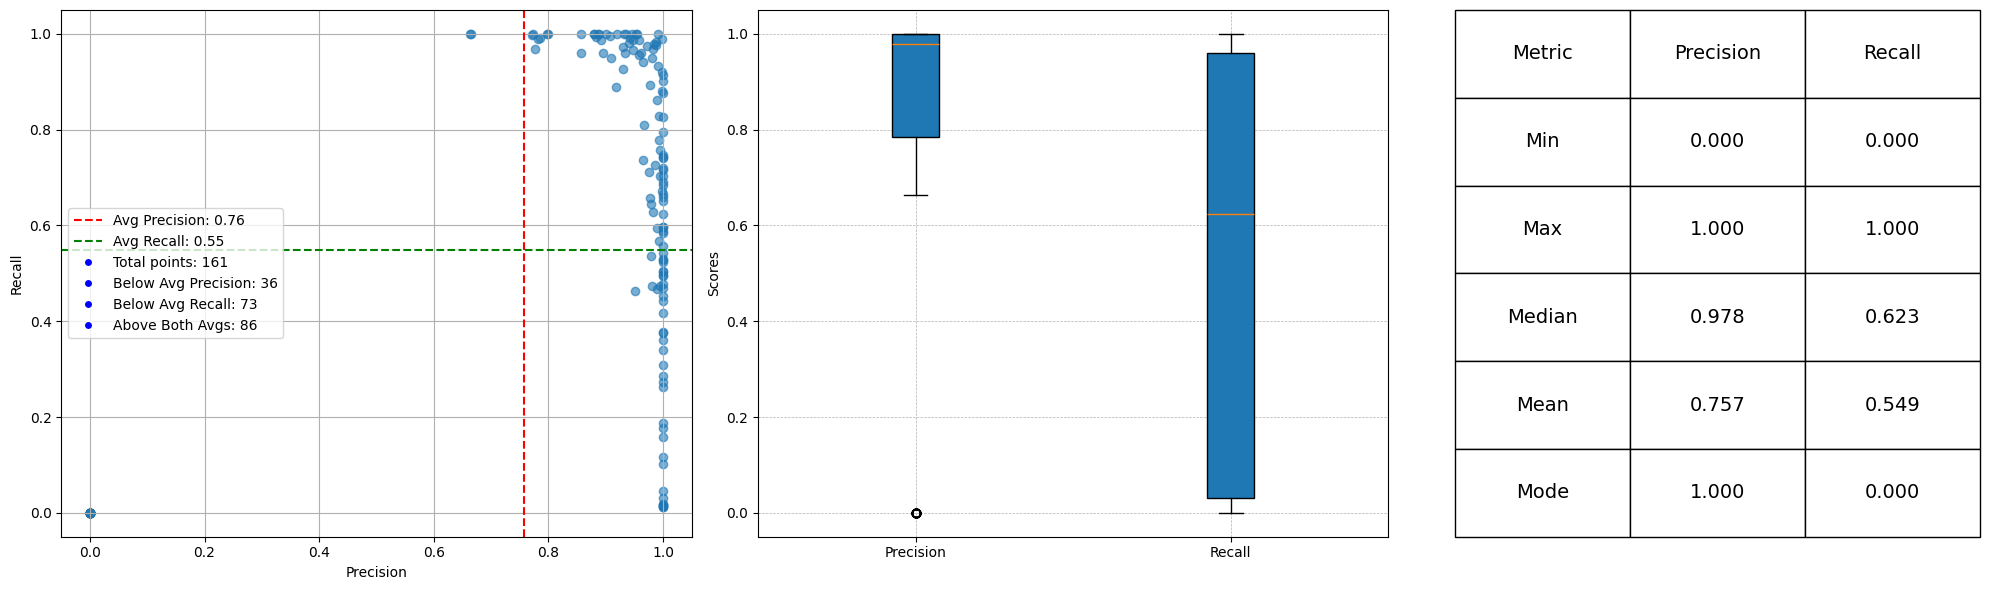

In [14]:
create_plots_with_table_and_boxplot_field(df_less_than_15, average_precision_field_less_than_15, average_recall_field_less_than_15, total_data_points_less_than_15, '/home/grenders95/710/710_project/data/figures/eval/llama2/2less15_scatter_box_field.png')
create_plots_with_table_and_boxplot_field(df_greater_than_or_equal_15, average_precision_field_greater_than_15, average_recall_field_greater_than_15, total_data_points_greater_than_or_equal_15, '/home/grenders95/710/710_project/data/figures/eval/llama2/2more15_scatter_box_field.png')


In [16]:
import pandas as pd
from collections import Counter

def parse_fields_to_values_dict(sbom_text, specific_fields):
    """Parse specified field keys and their values from the flattened SBOM text."""
    fields_values_dict = {field: [] for field in specific_fields}  
    
    if pd.isna(sbom_text):  
        return fields_values_dict
    
    for line in sbom_text.split('\n'):
        if line.strip():  
            field_key, _, field_value = line.partition(':')
            field_key = field_key.strip()
            field_value = field_value.strip()
            if field_key in fields_values_dict:
                # Special handling for downloadLocation
                if field_key == 'packages/downloadLocation' and field_value == 'NOASSERTION':
                    field_value = ''  
                fields_values_dict[field_key].append(field_value)
    
    return fields_values_dict

def calculate_value_precision_recall_for_sboms(gen_sbom_text, gt_sbom_text, specific_fields):
    gen_fields_values_dict = parse_fields_to_values_dict(gen_sbom_text, specific_fields)
    gt_fields_values_dict = parse_fields_to_values_dict(gt_sbom_text, specific_fields)
    
    tp, fp, fn = 0, 0, 0
    
    for field in specific_fields:
        gen_values_counter = Counter(gen_fields_values_dict[field])
        gt_values_counter = Counter(gt_fields_values_dict[field])
        
        for value, count in gen_values_counter.items():
            if value in gt_values_counter:
                tp += min(count, gt_values_counter[value])
                fp += max(count - gt_values_counter[value], 0)
            else:
                fp += count

        for value, count in gt_values_counter.items():
            if value not in gen_values_counter:
                fn += count
            else:
                fn += max(count - gen_values_counter[value], 0)
    
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    
    return precision, recall

In [17]:

# Define the specific fields of interest
specific_fields = [
    "creation/name", "creation/dataLicense", 
    "packages/name", "packages/versionInfo", 
    "packages/downloadLocation", "packages/licenseDeclared", 
    "packages/licenseConcluded"
]

results1 = df_llama2.apply(lambda row: calculate_value_precision_recall_for_sboms(
    row['flattened_gen_sbom1'], row['flattened_gt_sbom'], specific_fields), axis=1)

results2 = df_llama2.apply(lambda row: calculate_value_precision_recall_for_sboms(
    row['flattened_gen_sbom2'], row['flattened_gt_sbom'], specific_fields), axis=1)

results3 = df_llama2.apply(lambda row: calculate_value_precision_recall_for_sboms(
    row['flattened_gen_sbom3'], row['flattened_gt_sbom'], specific_fields), axis=1)

results4 = df_llama2.apply(lambda row: calculate_value_precision_recall_for_sboms(
    row['flattened_gen_sbom4'], row['flattened_gt_sbom'], specific_fields), axis=1)

results5 = df_llama2.apply(lambda row: calculate_value_precision_recall_for_sboms(
    row['flattened_gen_sbom5'], row['flattened_gt_sbom'], specific_fields), axis=1)


df_llama2['precision_value1'] = results1.apply(lambda x: x[0])
df_llama2['recall_value1'] = results1.apply(lambda x: x[1])

df_llama2['precision_value2'] = results2.apply(lambda x: x[0])
df_llama2['recall_value2'] = results2.apply(lambda x: x[1])

df_llama2['precision_value3'] = results1.apply(lambda x: x[0])
df_llama2['recall_value3'] = results1.apply(lambda x: x[1])

df_llama2['precision_value4'] = results2.apply(lambda x: x[0])
df_llama2['recall_value4'] = results2.apply(lambda x: x[1])

df_llama2['precision_value5'] = results1.apply(lambda x: x[0])
df_llama2['recall_value5'] = results1.apply(lambda x: x[1])



In [18]:
df_llama2['avg_precision_value'] = (df_llama2['precision_value1'] + df_llama2['precision_value2'] + df_llama2['precision_value3'] + df_llama2['precision_value4'] + df_llama2['precision_value5']) / 5
df_llama2['avg_recall_value'] = (df_llama2['recall_value1'] + df_llama2['recall_value2'] + df_llama2['recall_value3'] + df_llama2['recall_value4'] + df_llama2['recall_value5']) / 5


In [19]:
average_precision_values = df_llama2['avg_precision_value'].mean()
average_recall_values = df_llama2['avg_recall_value'].mean()
data_points = len(df_llama2)

In [21]:
print(average_precision_values)
print(average_recall_values)

0.748388892777326
0.6174854710785481


In [22]:
# Count the number of rows where avg_precision_field and avg_recall_field are both 0
num_rows_with_zero = len(df_llama2[(df_llama2['avg_precision_field'] == 0) & (df_llama2['avg_recall_field'] == 0)])

print("Number of rows where both avg_precision_field and avg_recall_field are 0:", num_rows_with_zero)

num_rows_with_zerovalue = len(df_llama2[(df_llama2['avg_precision_value'] == 0) & (df_llama2['avg_recall_value'] == 0)])

print("Number of rows where both avg_precision_value and avg_recall_value are 0:", num_rows_with_zero)

Number of rows where both avg_precision_field and avg_recall_field are 0: 34
Number of rows where both avg_precision_value and avg_recall_value are 0: 34


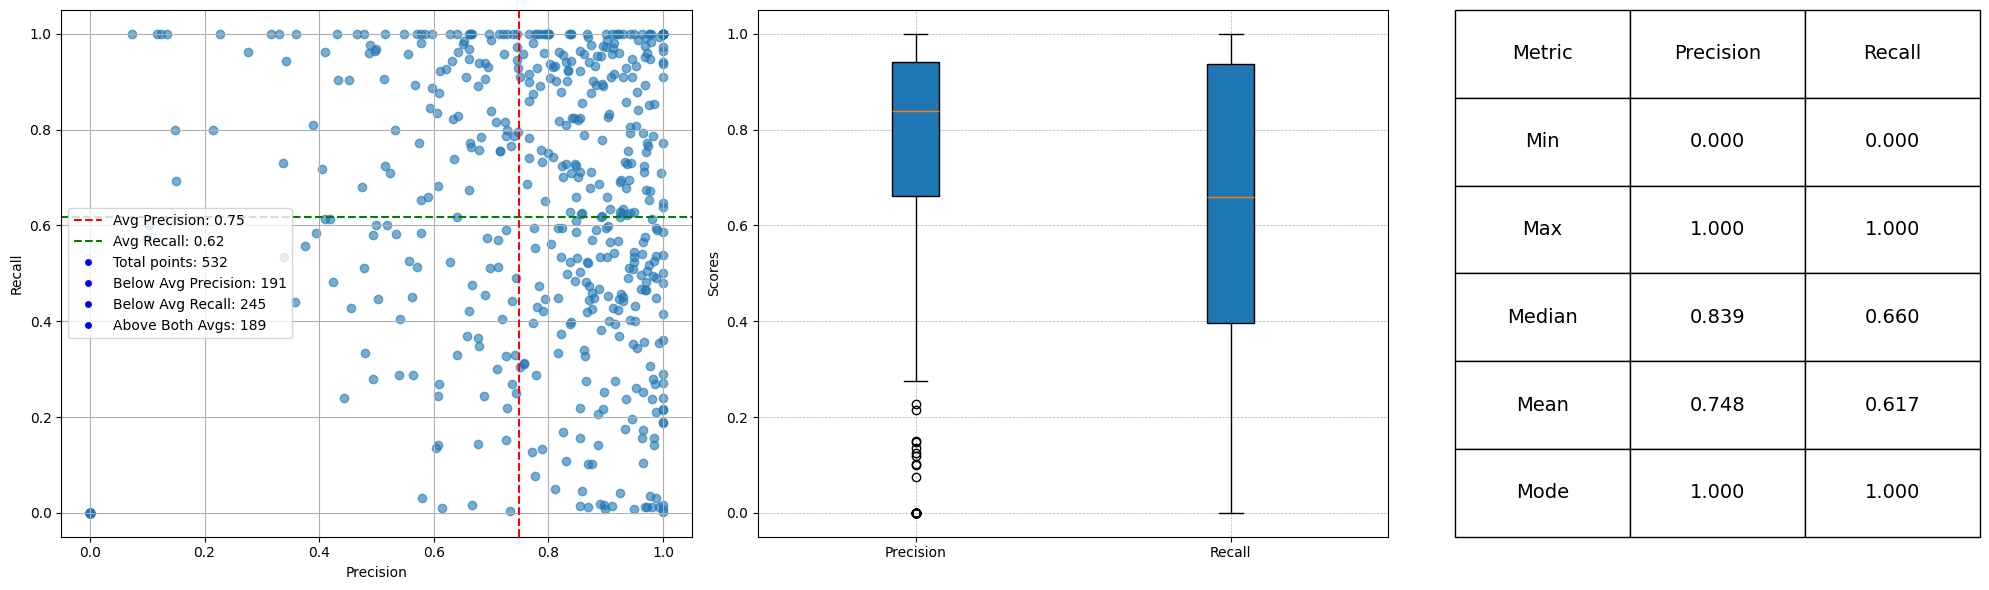

In [23]:
average_precision_values = df_llama2['avg_precision_value'].mean()
average_recall_values = df_llama2['avg_recall_value'].mean()
data_points = len(df_llama2)

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import mode
import numpy as np

def create_plots_with_table_and_boxplot_value(dataframe, avg_precision, avg_recall, data_points, save_path):
    fig = plt.figure(figsize=(20, 6))
    gs = fig.add_gridspec(1, 3, width_ratios=[3, 3, 2.5])

    # Scatter plot
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter(dataframe['avg_precision_value'], dataframe['avg_recall_value'], alpha=0.6)
    ax1.set_xlabel('Precision')
    ax1.set_ylabel('Recall')
    ax1.grid(True)
    ax1.axvline(x=avg_precision, color='r', linestyle='--', label=f'Avg Precision: {avg_precision:.2f}')
    ax1.axhline(y=avg_recall, color='g', linestyle='--', label=f'Avg Recall: {avg_recall:.2f}')

    # Calculate additional metrics for the legend
    points_below_avg_precision = dataframe[dataframe['avg_precision_value'] < avg_precision].shape[0]
    points_below_avg_recall = dataframe[dataframe['avg_recall_value'] < avg_recall].shape[0]
    points_above_both = dataframe[(dataframe['avg_precision_value'] > avg_precision) & (dataframe['avg_recall_value'] > avg_recall)].shape[0]

    # Create custom legend entries
    custom_lines = [mlines.Line2D([], [], color='r', linestyle='--', markersize=15, label=f'Avg Precision: {avg_precision:.2f}'),
                    mlines.Line2D([], [], color='g', linestyle='--', markersize=15, label=f'Avg Recall: {avg_recall:.2f}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Total points: {data_points}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Precision: {points_below_avg_precision}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Recall: {points_below_avg_recall}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Above Both Avgs: {points_above_both}')]

    # Add the custom legend to the plot
    ax1.legend(handles=custom_lines, loc='center left')

    # Box plot
    ax2 = fig.add_subplot(gs[1])
    ax2.boxplot(
        [dataframe['avg_precision_value'], dataframe['avg_recall_value']],
        patch_artist=True,
        labels=['Precision', 'Recall']
    )
    ax2.set_ylabel('Scores')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Prepare data for the table
    stats_precision = get_statistics(dataframe['avg_precision_value'].dropna())
    stats_recall = get_statistics(dataframe['avg_recall_value'].dropna())

    # Table data
    table_data = [
        ["Min", stats_precision[0], stats_recall[0]],
        ["Max", stats_precision[1], stats_recall[1]],
        ["Median", stats_precision[2], stats_recall[2]],
        ["Mean", stats_precision[3], stats_recall[3]],
        ["Mode", stats_precision[4] or "N/A", stats_recall[4] or "N/A"]
    ]

    ax3 = fig.add_subplot(gs[2])
    ax3.axis('off')
    table = ax3.table(cellText=table_data, colLabels=['Metric', 'Precision', 'Recall'], cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()

def format_statistic(value):
    if value is None or (isinstance(value, np.ndarray) and value.size == 0):
        return "N/A"
    return f"{value:.3f}"

def get_statistics(column):
    mode_result = mode(column, nan_policy='omit')
    mode_val = mode_result.mode if mode_result.mode.size > 0 else None
    return [
        format_statistic(np.min(column)),
        format_statistic(np.max(column)),
        format_statistic(np.median(column)),
        format_statistic(np.mean(column)),
        format_statistic(mode_val)
    ]

create_plots_with_table_and_boxplot_value(df_llama2, average_precision_values, average_recall_values, data_points, '/home/grenders95/710/710_project/data/figures/eval/llama2/2testset_scatter_box_value.png')

In [24]:
# Filter the DataFrame into two subsets
df_less_than_15 = df_llama2[df_llama2['num_dependencies'] < 15]
df_greater_than_or_equal_15 = df_llama2[df_llama2['num_dependencies'] >= 15]

# Calculate average precision and recall for each subset
average_precision_value_less_than_15 = df_less_than_15['avg_precision_value'].mean()
average_recall_value_less_than_15 = df_less_than_15['avg_recall_value'].mean()

average_precision_value_greater_than_15 = df_greater_than_or_equal_15['avg_precision_value'].mean()
average_recall_value_greater_than_15 = df_greater_than_or_equal_15['avg_recall_value'].mean()

total_data_points_less_than_15 = len(df_less_than_15) 
total_data_points_greater_than_or_equal_15 = len(df_greater_than_or_equal_15) 

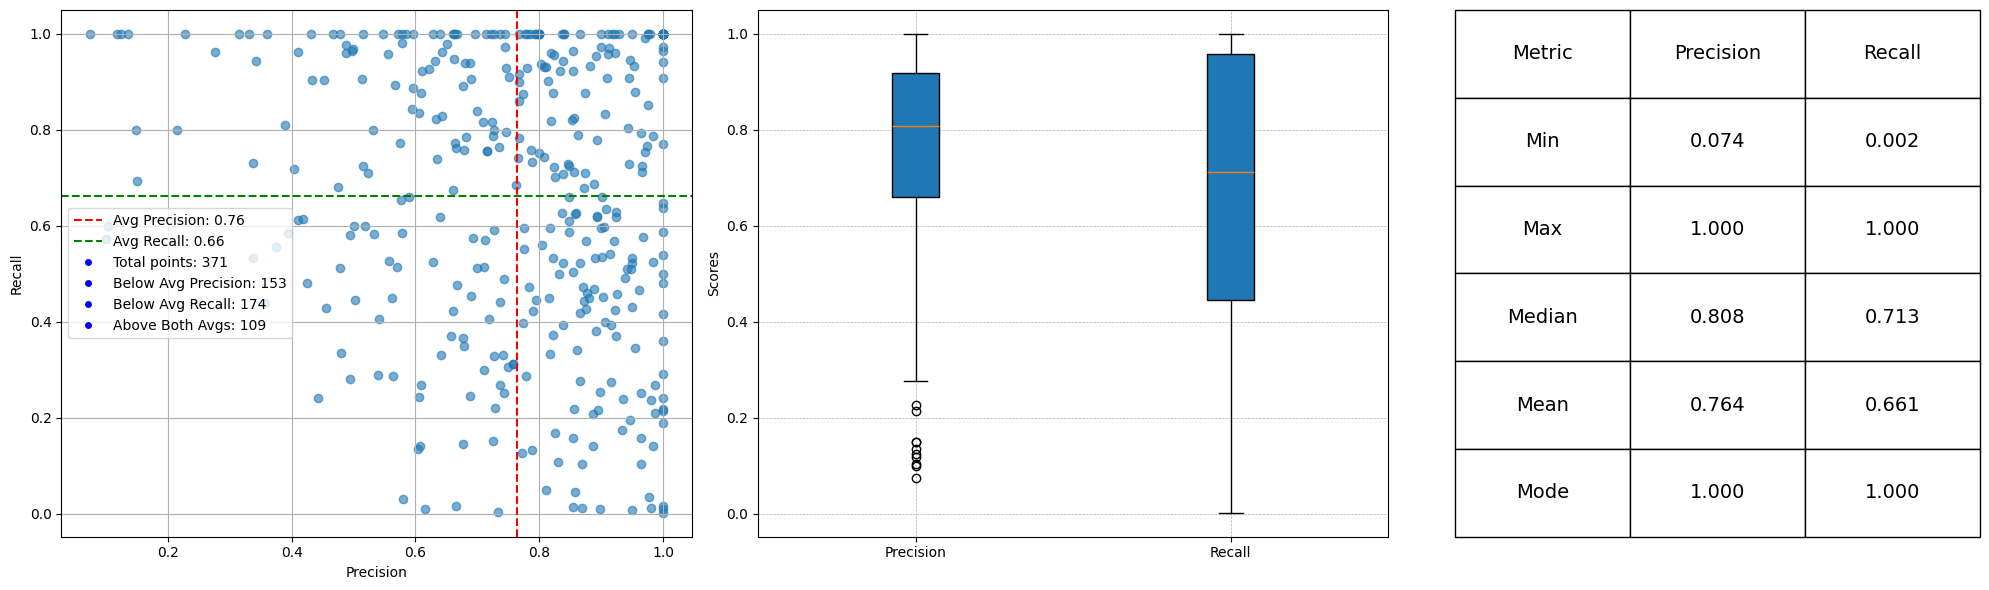

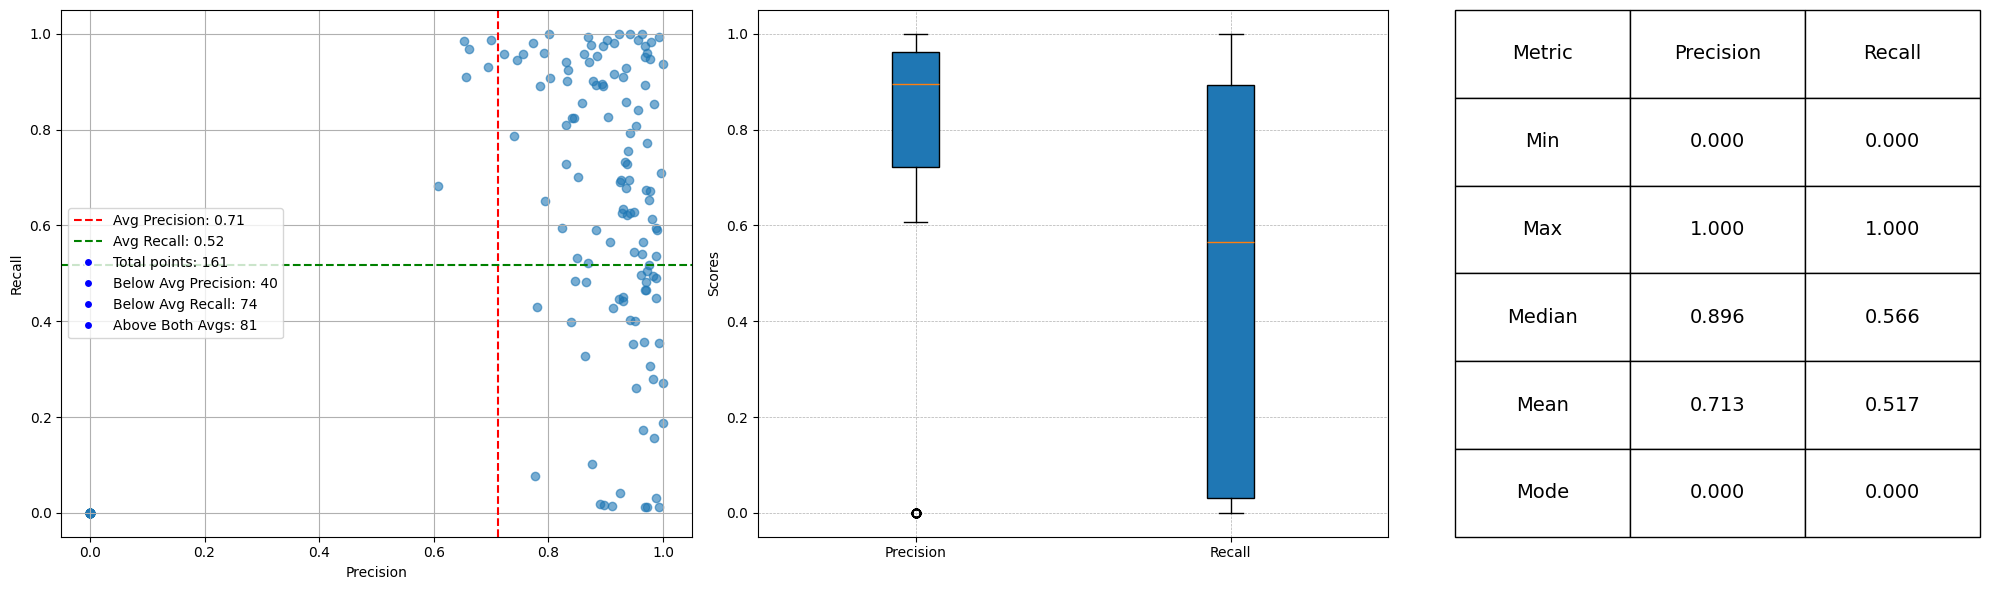

In [25]:
create_plots_with_table_and_boxplot_value(df_less_than_15, average_precision_value_less_than_15, average_recall_value_less_than_15, total_data_points_less_than_15, '/home/grenders95/710/710_project/data/figures/eval/llama2/2less15_scatter_box_value.png')
create_plots_with_table_and_boxplot_value(df_greater_than_or_equal_15, average_precision_value_greater_than_15, average_recall_value_greater_than_15, total_data_points_greater_than_or_equal_15, '/home/grenders95/710/710_project/data/figures/eval/llama2/2more15_scatter_box_value.png')

In [26]:
# save to csv

df_llama2.to_csv('/home/grenders95/710/710_project/data/eval/llama2_set_eval.csv', index=False)